In [0]:
# Change directory to VSCode workspace root so that relative path loads work correctly. Turn this addition off with the DataScience.changeDirOnImportExport setting
# ms-python.python added
import os
try:
	os.chdir(os.path.join(os.getcwd(), '..'))
	print(os.getcwd())
except:
	pass


In [1]:

import os

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from IPython.core.interactiveshell import InteractiveShell


# Setting styles
InteractiveShell.ast_node_interactivity = "all"
sns.set(style="whitegrid", color_codes=True, rc={"figure.figsize": (12.7, 9.27)})

# savepath for figures
savepath = os.path.join("reports", "figures")


In [2]:

df = pd.read_csv(os.path.join("data", "predictions", "predictions.csv"), index_col=0)


In [3]:


def distance75(df, model_name):

    pred_lon = df[model_name + "_lon"]
    pred_lat = df[model_name + "_lat"]
    pred_floor = df[model_name + "_floor"]
    pred_building = df[model_name + "_building"]

    distance75 = (
        np.absolute(pred_lon - df.longitude)
        + np.absolute(pred_lat - df.latitude)
        + 4 * np.absolute(pred_floor - df.floor)
        + 50 * np.absolute(pred_building - df.buildingid)
    )

    return distance75


def scores(df, model_name):

    pred_lon = df[model_name + "_lon"]
    pred_lat = df[model_name + "_lat"]
    pred_floor = df[model_name + "_floor"]
    pred_building = df[model_name + "_building"]

    lon_score = np.mean(np.absolute(pred_lon - df.longitude))
    lat_score = np.mean(np.absolute(pred_lat - df.latitude))
    right_floor = np.round(np.mean(pred_floor == df.floor) * 100, 2)
    right_building = np.round(np.mean(pred_building == df.buildingid) * 100, 2)

    return lon_score, lat_score, right_floor, right_building



In [4]:

df["distance_k_and_radius"] = distance75(df, "k_and_radius")
df["distance_knn_grouping"] = distance75(df, "knn_grouping")
df["distance_catboost_ensemble"] = distance75(df, "catboost_ensemble")

df["lon_score_k_and_radius"], df["lat_score_k_and_radius"], df[
    "floor_score_k_and_radius"
], df["building_score_k_and_radius"] = scores(df, "k_and_radius")

df["lon_score_knn_grouping"], df["lat_score_knn_grouping"], df[
    "floor_score_knn_grouping"
], df["building_score_knn_grouping"] = scores(df, "knn_grouping")

df["lon_score_catboost_ensemble"], df["lat_score_catboost_ensemble"], df[
    "floor_score_catboost_ensemble"
], df["building_score_catboost_ensemble"] = scores(df, "catboost_ensemble")

model_names = ["k_and_radius", "knn_grouping", "catboost_ensemble"]
model_titles = ["K and Radius", "KNN Grouping", "CatBoost Ensemble"]


Text(0.5, 1.0, 'K and Radius: Predicted Locations with Prediction Error')

Text(0.5, 0, 'Longitude')

Text(0, 0.5, 'Latitude')

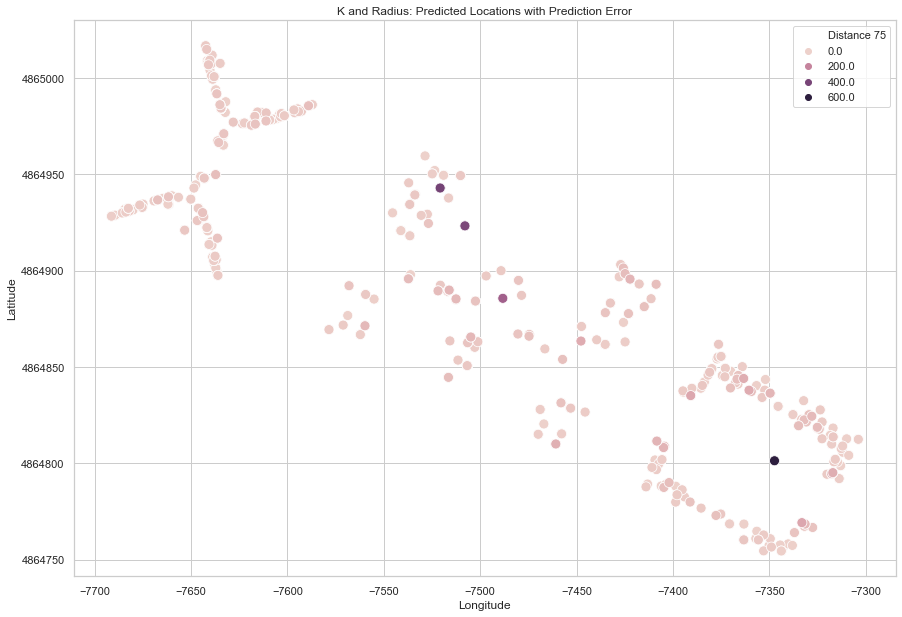

Text(0.5, 1.0, 'K and Radius: Real Locations with Prediction Error')

Text(0.5, 0, 'Longitude')

Text(0, 0.5, 'Latitude')

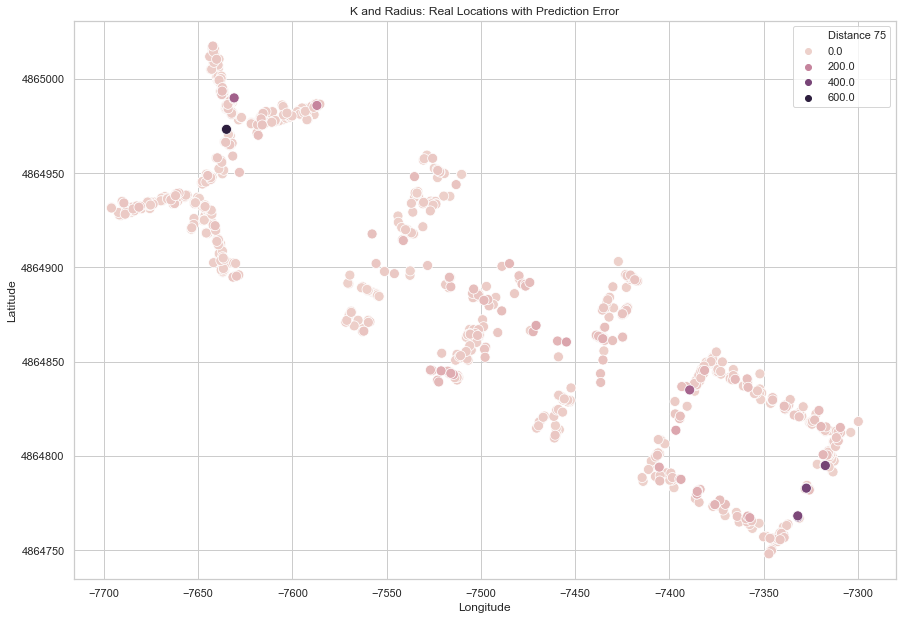

Text(0.5, 1.0, 'KNN Grouping: Predicted Locations with Prediction Error')

Text(0.5, 0, 'Longitude')

Text(0, 0.5, 'Latitude')

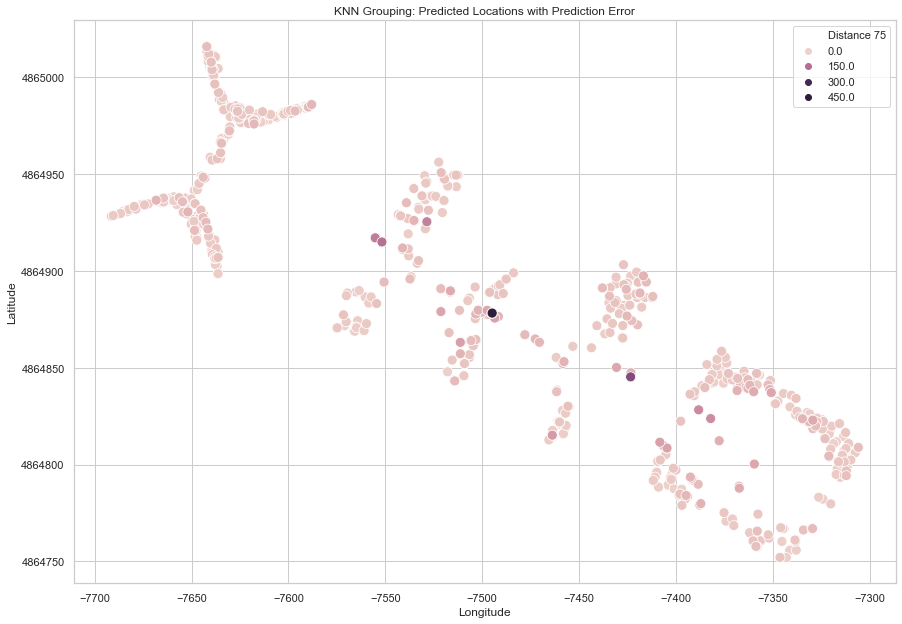

Text(0.5, 1.0, 'KNN Grouping: Real Locations with Prediction Error')

Text(0.5, 0, 'Longitude')

Text(0, 0.5, 'Latitude')

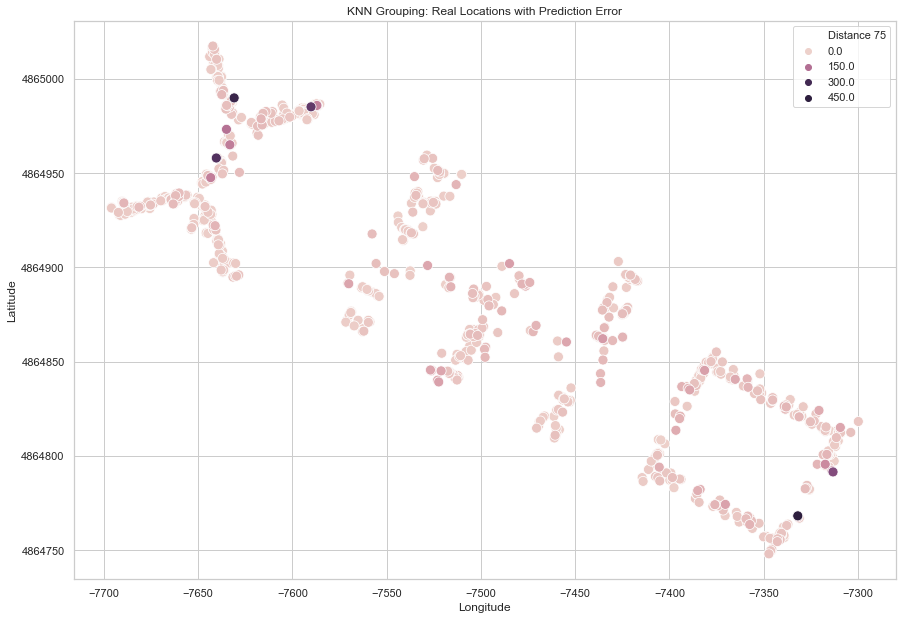

Text(0.5, 1.0, 'CatBoost Ensemble: Predicted Locations with Prediction Error')

Text(0.5, 0, 'Longitude')

Text(0, 0.5, 'Latitude')

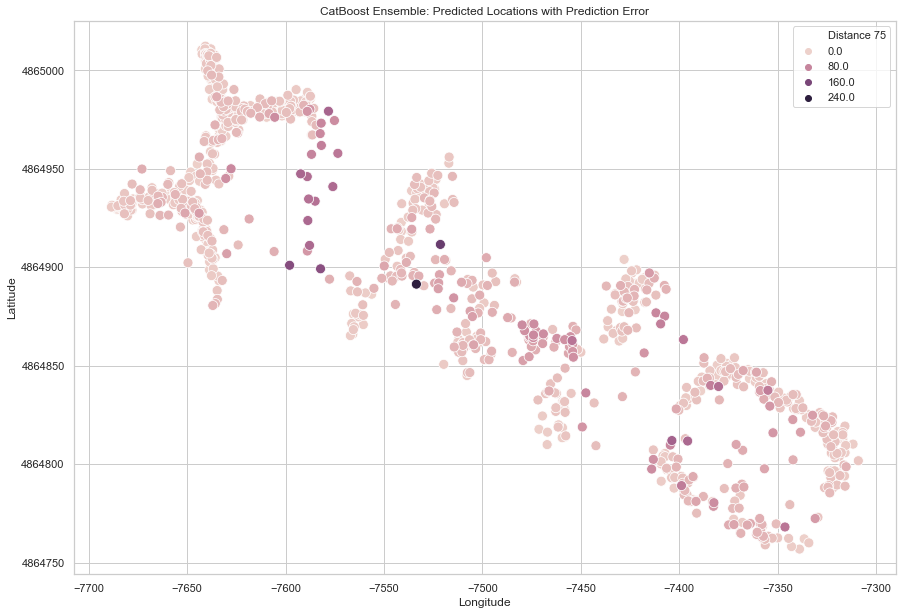

Text(0.5, 1.0, 'CatBoost Ensemble: Real Locations with Prediction Error')

Text(0.5, 0, 'Longitude')

Text(0, 0.5, 'Latitude')

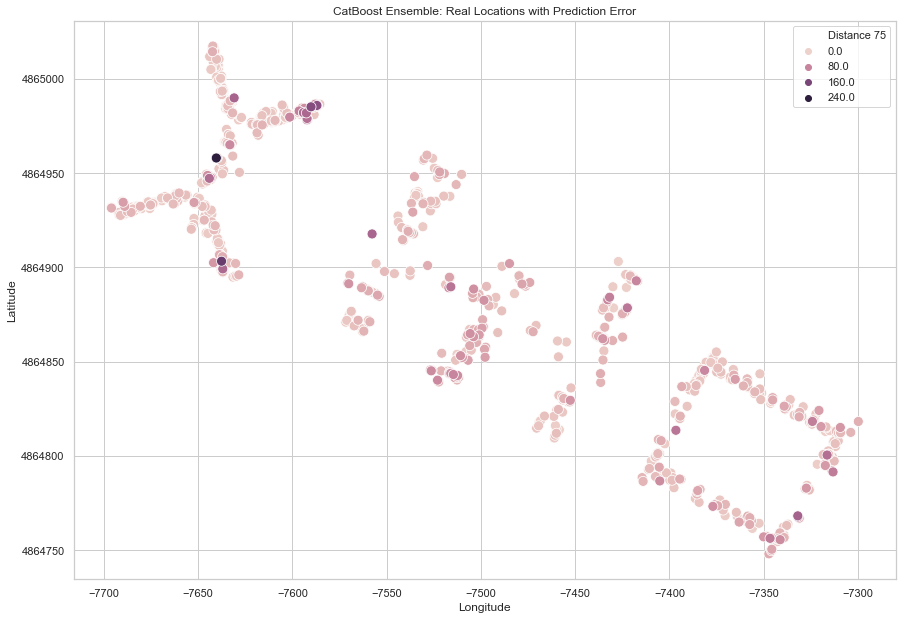

In [5]:

for model_name, model_title in zip(model_names, model_titles):

    # top down pictures

    fig, ax = plt.subplots()
    sns.scatterplot(
        x=model_name + "_lon",
        y=model_name + "_lat",
        hue="distance_" + model_name,
        ax=ax,
        s=100,
        data=df.sort_values(by="distance_" + model_name),
    )
    ax.set_aspect(aspect="equal")
    plt.title(f"{model_title}: Predicted Locations with Prediction Error")
    plt.xlabel("Longitude")
    plt.ylabel("Latitude")
    legend = ax.legend()
    legend.texts[0].set_text("Distance 75")
    plt.tight_layout()
    plt.savefig(
        os.path.join(savepath, model_name + "_error_of_predicted_locations.png")
    )
    plt.show()

    fig, ax = plt.subplots()
    sns.scatterplot(
        x="longitude",
        y="latitude",
        hue="distance_" + model_name,
        s=100,
        data=df.sort_values(by="distance_" + model_name),
        ax=ax,
    )
    ax.set_aspect(aspect="equal")
    plt.title(f"{model_title}: Real Locations with Prediction Error")
    plt.xlabel("Longitude")
    plt.ylabel("Latitude")
    legend = ax.legend()
    legend.texts[0].set_text("Distance 75")
    plt.tight_layout()
    plt.savefig(os.path.join(savepath, model_name + "_error_of_actual_locations.png"))
    plt.show()



Text(0.5, 0, '')

Text(0.5, 0, 'Longitude')

Text(0, 0.5, 'Average Distance 75')

Text(0, 0.5, 'Number of observations')

(0, 80)

(-7700, -7300)

(-7700, -7300)

Text(0.5, 1.0, 'Prediction Error by Longitude')

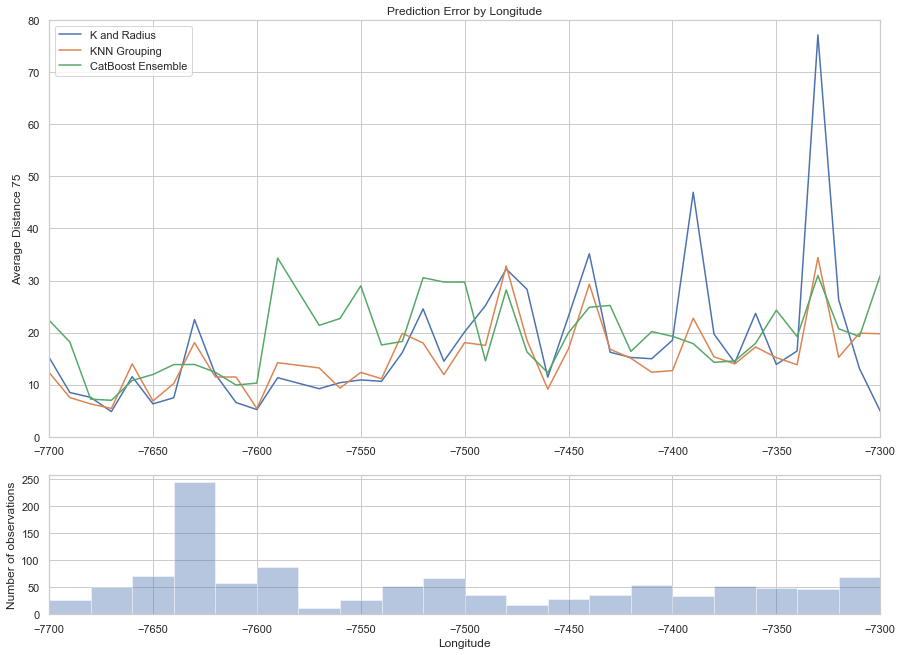

In [6]:

fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, gridspec_kw={"height_ratios": [3, 1]})
for model_name, model_title in zip(model_names, model_titles):
    sns.lineplot(
        x=np.round(df["longitude"], -1),
        y=df["distance_" + model_name],
        ci=None,
        label=model_title,
        ax=ax1,
    )
sns.distplot(np.round(df["longitude"], -1), bins=20, kde=False, ax=ax2)
ax1.legend(loc=2)
ax1.set_xlabel("")
ax2.set_xlabel("Longitude")
ax1.set_ylabel("Average Distance 75")
ax2.set_ylabel("Number of observations")
ax1.set_ylim([0, 80])
ax1.set_xlim([-7700, -7300])
ax2.set_xlim([-7700, -7300])
ax1.set_title("Prediction Error by Longitude")
plt.tight_layout()
plt.savefig(os.path.join(savepath, "error_longitude.png"))
plt.show()



Text(0.5, 0, '')

Text(0.5, 0, 'Latitude')

Text(0, 0.5, 'Average Distance 75')

Text(0, 0.5, 'Number of observations')

(0, 80)

(4864750, 4865020)

(4864750, 4865020)

Text(0.5, 1.0, 'Prediction Error by Latitude')

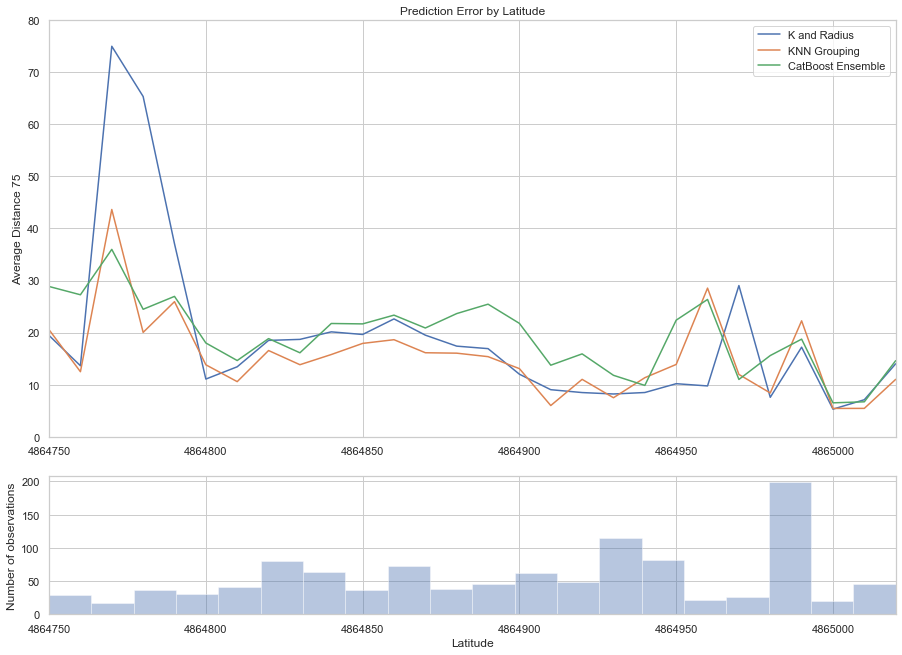

In [7]:

fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, gridspec_kw={"height_ratios": [3, 1]})
for model_name, model_title in zip(model_names, model_titles):
    sns.lineplot(
        x=np.round(df["latitude"], -1),
        y=df["distance_" + model_name],
        ci=None,
        label=model_title,
        ax=ax1,
    )
sns.distplot(np.round(df["latitude"], -1), bins=20, kde=False, ax=ax2)
ax1.legend(loc=1)
ax1.set_xlabel("")
ax2.set_xlabel("Latitude")
ax1.set_ylabel("Average Distance 75")
ax2.set_ylabel("Number of observations")
ax1.set_ylim([0, 80])
ax1.set_xlim([4864750, 4865020])
ax2.set_xlim([4864750, 4865020])
ax1.set_title("Prediction Error by Latitude")
plt.tight_layout()
plt.savefig(os.path.join(savepath, "error_latitude.png"))
plt.show()



In [8]:

# floor
distance_melt = df[
    [
        "floor",
        "buildingid",
        "distance_k_and_radius",
        "distance_knn_grouping",
        "distance_catboost_ensemble",
    ]
].melt(
    id_vars=["floor", "buildingid"],
    value_vars=[
        "distance_k_and_radius",
        "distance_knn_grouping",
        "distance_catboost_ensemble",
    ],
)


(0, 70)

Text(0.5, 0, '')

Text(0, 0.5, 'Distance 75')

Text(0.5, 0, 'Floor')

Text(0, 0.5, 'Number of observations')

Text(0.5, 1.0, 'Prediction Error by Floor')

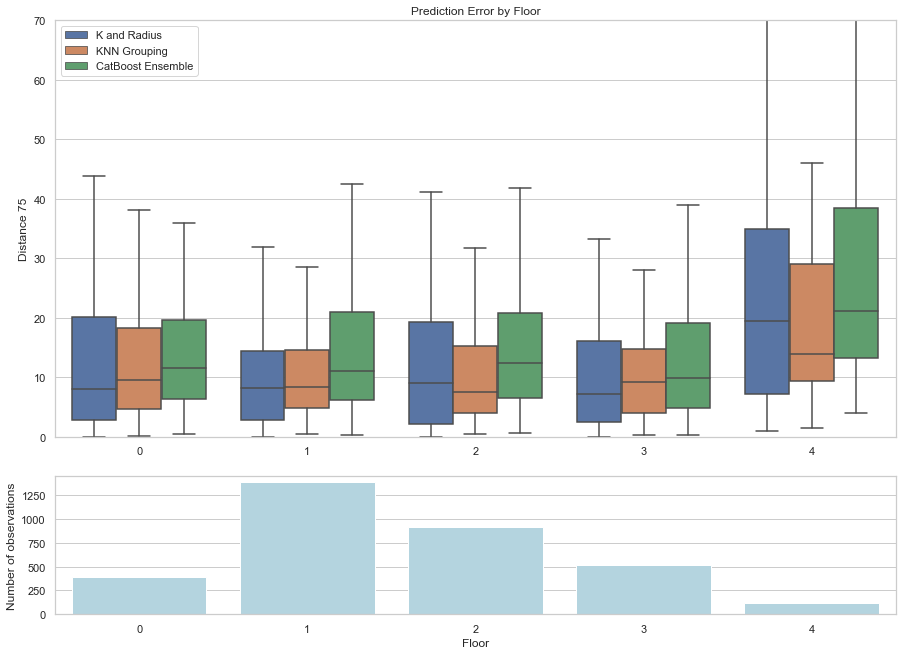

In [9]:

# building
fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, gridspec_kw={"height_ratios": [3, 1]})
sns.boxplot(
    x="floor",
    y="value",
    hue="variable",
    fliersize=0,
    data=distance_melt,
    ax=ax1,
    dodge=True,
)
sns.countplot(x="floor", color="lightblue", data=distance_melt, ax=ax2)
ax1.set_ylim([0, 70])
ax1.set_xlabel("")
ax1.set_ylabel("Distance 75")
ax2.set_xlabel("Floor")
ax2.set_ylabel("Number of observations")
ax1.set_title("Prediction Error by Floor")
legend = ax1.legend(loc=2)
for i in range(len(model_titles)):
    legend.texts[i].set_text(model_titles[i])
plt.tight_layout()
plt.savefig(os.path.join(savepath, "error_floor.png"))
plt.show()


(0, 70)

Text(0.5, 0, '')

Text(0, 0.5, 'Distance 75')

Text(0.5, 0, 'Building')

Text(0, 0.5, 'Number of observations')

Text(0.5, 1.0, 'Prediction Error by Building')

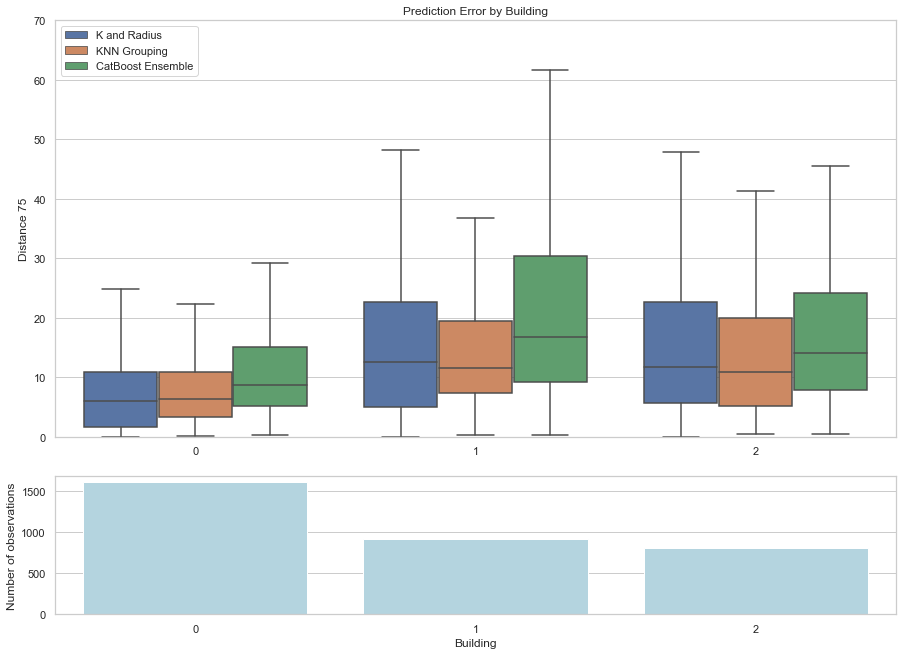

In [10]:

# floor
fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, gridspec_kw={"height_ratios": [3, 1]})
sns.boxplot(
    x="buildingid",
    y="value",
    hue="variable",
    fliersize=0,
    data=distance_melt,
    ax=ax1,
    dodge=True,
)
sns.countplot(x="buildingid", color="lightblue", data=distance_melt, ax=ax2)
ax1.set_ylim([0, 70])
ax1.set_xlabel("")
ax1.set_ylabel("Distance 75")
ax2.set_xlabel("Building")
ax2.set_ylabel("Number of observations")
ax1.set_title("Prediction Error by Building")
legend = ax1.legend(loc=2)
for i in range(len(model_titles)):
    legend.texts[i].set_text(model_titles[i])
plt.tight_layout()
plt.savefig(os.path.join(savepath, "error_building.png"))
plt.show()


In [11]:


def calculate_cumprob(df, distance_column):
    cumprob = (
        df[[distance_column]]
        .round(2)
        .sort_values(by=distance_column)
        .reset_index(drop=True)
    )
    cumprob["percent"] = cumprob.index / len(cumprob) * 100
    cumprob.drop_duplicates(subset=distance_column, keep="last", inplace=True)

    return cumprob


cumprob_distance_k_and_radius = calculate_cumprob(df, "distance_k_and_radius")
cumprob_distance_knn_grouping = calculate_cumprob(df, "distance_knn_grouping")
cumprob_distance_catboost_ensemble = calculate_cumprob(df, "distance_catboost_ensemble")


Text(0, 0.5, '% Error Smaller or Equal')

Text(0.5, 0, 'Distance 75')

(0, 100)

(0, 100)

Text(0.5, 1.0, 'Cumulative Error Distribution')

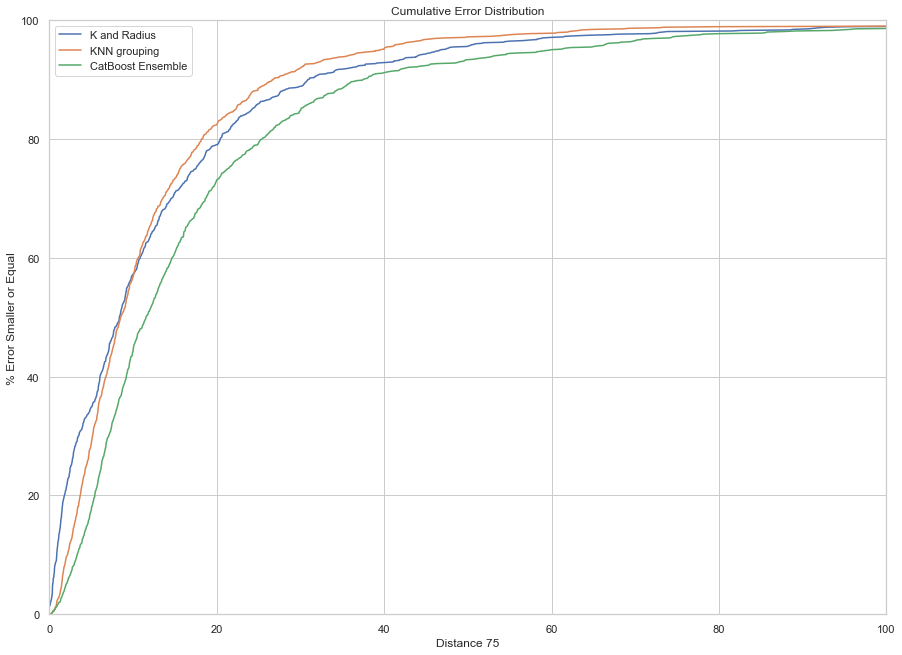

In [12]:

sns.lineplot(
    x="distance_k_and_radius",
    y="percent",
    data=cumprob_distance_k_and_radius,
    label="K and Radius",
)
sns.lineplot(
    x="distance_knn_grouping",
    y="percent",
    data=cumprob_distance_knn_grouping,
    label="KNN grouping",
)
sns.lineplot(
    x="distance_catboost_ensemble",
    y="percent",
    data=cumprob_distance_catboost_ensemble,
    label="CatBoost Ensemble",
)
plt.ylabel("% Error Smaller or Equal")
plt.xlabel("Distance 75")
plt.xlim([0, 100])
plt.ylim([0, 100])
plt.title("Cumulative Error Distribution")
plt.tight_layout()
plt.savefig(os.path.join(savepath, "error_cumulative.png"))
plt.show()



[Text(0, 0, 'K and Radius'),
 Text(0, 0, 'KNN Grouping'),
 Text(0, 0, 'CatBoost Ensemble')]

(0, 45)

(0, 100)

(0, 100)

Text(0, 0.5, '')

Text(0, 0.5, '')

Text(0, 0.5, '')

Text(0.5, 0, 'Distance 75')

Text(0.5, 0, '% Floor Correct')

Text(0.5, 0, '% Building Correct')

Text(0.5, 1.0, 'Summary of Model Accuracies')

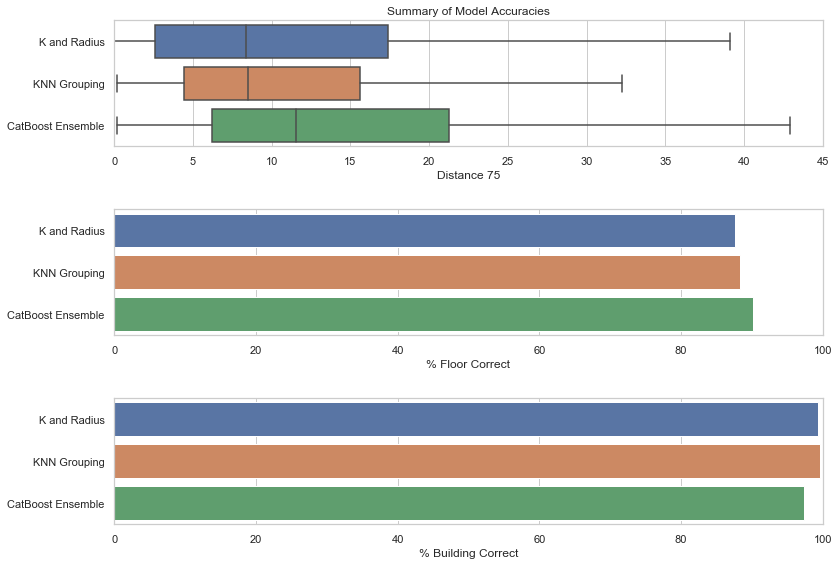

In [13]:

fig, (ax1, ax2, ax3) = plt.subplots(nrows=3, ncols=1)
sns.boxplot(y="variable", x="value", fliersize=0, data=distance_melt, ax=ax1)
sns.barplot(
    x=[
        df.floor_score_k_and_radius[0],
        df.floor_score_knn_grouping[0],
        df.floor_score_catboost_ensemble[0],
    ],
    y=model_titles,
    ax=ax2,
)
sns.barplot(
    x=[
        df.building_score_k_and_radius[0],
        df.building_score_knn_grouping[0],
        df.building_score_catboost_ensemble[0],
    ],
    y=model_titles,
    ax=ax3,
)
ax1.set_yticklabels(model_titles)
ax1.set_xlim([0, 45])
ax2.set_xlim([0, 100])
ax3.set_xlim([0, 100])
ax1.set_ylabel("")
ax2.set_ylabel("")
ax3.set_ylabel("")
ax1.set_xlabel("Distance 75")
ax2.set_xlabel("% Floor Correct")
ax3.set_xlabel("% Building Correct")
ax1.set_title("Summary of Model Accuracies")
plt.subplots_adjust(hspace=0.5)
plt.savefig(os.path.join(savepath, "error_summary.png"))
plt.show()
